# Multiple Linear Regression

Multiple linear regression deals with a scenario involving more than one predictor. The outcome is affected by several predictors. The model resulted from this regression technique will have the follwoing form:

\begin{align*}
y &= b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3 + ... + b_n x_n\\
\end{align*}

The variables *$x_1, x_2, ... x_N$* represent the number of N predictors.

Please note that the term *linear* refers to the use of linear constants *$b_0, b_1, ... b_n$*

Now let's start with the dataset we will work on:



The dataset comprises of 4 predictors, *R&D Spend, Administration Spend, Marketing Spend and State*, and one outcome *Profit*. The dataset has 50 records, with no *NaN* or invalid data, though it has 0 values in some cells.

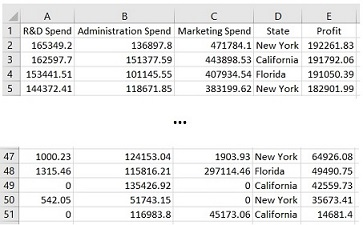

Let's start with the script:

In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

.

**Reading Dataset**

In [2]:
mydataset = pd.read_csv('Startups.csv')
print("\nThe type of mydataset: ", type(mydataset))
print("The shape of mydataset: ", mydataset.shape)
print("The first 5 records of mydataset:\n", mydataset.head())
print("\nThe statistical description of mydataset: \n", mydataset.describe())
X = mydataset.iloc[:, :-1].values # X is numpy's array, 2 dimensions
y = mydataset.iloc[:, 4].values   # y is numpy's array, 1 dimension or scalar
print("\nThe shape of predictor array X: ", X.shape)
print("The first 5 records of the predictor array X:\n", X[0:5,:])


The type of mydataset:  <class 'pandas.core.frame.DataFrame'>
The shape of mydataset:  (50, 5)
The first 5 records of mydataset:
    R&D Spend  Administration Spend  Marketing Spend       State     Profit
0  165349.20             136897.80        471784.10    New York  192261.83
1  162597.70             151377.59        443898.53  California  191792.06
2  153441.51             101145.55        407934.54     Florida  191050.39
3  144372.41             118671.85        383199.62    New York  182901.99
4  142107.34              91391.77        366168.42     Florida  166187.94

The statistical description of mydataset: 
            R&D Spend  Administration Spend  Marketing Spend         Profit
count      50.000000             50.000000        50.000000      50.000000
mean    73721.615600         121344.639600    211025.097800  112012.639200
std     45902.256482          28017.802755    122290.310726   40306.180338
min         0.000000          51283.140000         0.000000   14681.400000

.

**Handling Categorical Data and Dummy Variable Trap**

Our data has one categorical predictor *State* (col. 3), which is non-numeric. We use *OneHotEncoder* from *sklearn* for it. 

In [3]:
from sklearn.preprocessing import OneHotEncoder
print('The X: \n', X[0:5,:])
statepred = np.unique(X[:,3])
ohe = OneHotEncoder(categories=[statepred])
Xcol3 = ohe.fit_transform(X[:, 3:4]).toarray()
Xcoded = np.append(Xcol3, X[:, 0:3], axis=1)
print('The Xcoded: \n', Xcoded[0:5,:])

The X: 
 [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
The Xcoded: 
 [[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


The col-3 of $X$ is categorical predictor. It has been encoded into numerical value as col-0 to col-2 in $Xcoded$.

If you see col-0 to col-2, it contains duplicated information. Notice that col-0 will only be '1' if col-2 and col-3 are both '0'. This situation is called Dummy Variable Trap, because col-0 is basically a dummy variable that is not necessary, and which can slow down the speed the machine in analysing the data. 

You can also see it from binary code perspective. We need 3 labels to code, which should need no more than 2 bits. So basically col-0 can be removed: 

In [4]:
X = Xcoded[:, 1:]
print("The shape of X: ", X.shape)
print("The X: ", X[0:5,:])

The shape of X:  (50, 5)
The X:  [[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]]


.

**Split Dataset**

Now split the *-X-* and *-y-* into training data and test data. Let us use 20% (or 10 records from the entire 50 records) for test data:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (40, 5)
The shape of X_test:  (10, 5)
The shape of y_train:  (40,)
The shape of y_test:  (10,)


.

**Performing Regression**

The training dataset *X_train* and *y_train* are ready. Now let's us create the machine itself, train it. We will use *LinearRegression* from the package *sklearn*:

In [6]:
from sklearn.linear_model import LinearRegression
myregressor = LinearRegression()
myregressor.fit(X_train, y_train)  # Now fit the training data X and y
                                   # Remember that X has multiple Columns, i.e. multiplr linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


.

**Using the model to predict**

At this point, the machine *myregressor* has learned the dataset and develop a model/algorithm. We will now use it for making a prediction using the test data *X_test*:

In [7]:
y_pred = myregressor.predict(X_test)

.

**Comparing the prediction result**

Now we have *y_pred*, as the result from applying the model (algorithm) to the *X_test*. Let us now compare the *y_pred* with the actual *y_test*, using the plot scatter:

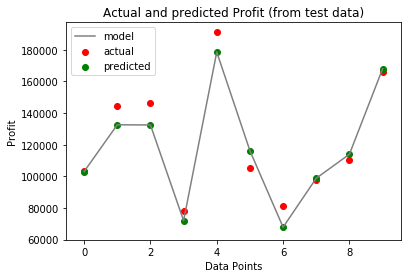

In [8]:
xrange = np.arange(0,len(y_test),1)  # x-axis range for plotting the y_pred
plt.scatter(xrange, y_test, color='red', label='actual')          # Scatter the actual y_test
plt.scatter(xrange, y_pred, color = 'green', label='predicted')      # Plot the resulted y_pred
plt.plot(xrange, y_pred, color = 'grey', label='model')
plt.title('Actual and predicted Profit (from test data)')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.show()

As you can see on the above plot, the model, the grey line, is not a simple straight line like in the simple linear regression. It comprises concatenated several straight lines. The green dots are the predicted outcome lying on the model line. The red dots are the actual data. 

You may want a comparison in the form of a table between *y_test* and *y_pred*:

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print ("\nType of df: ", type(df))
print ("\nThe df: \n", df)


Type of df:  <class 'pandas.core.frame.DataFrame'>

The df: 
       Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696


.

**Evaluating the regressor**

Now we want to know how to evaluate the model. We can still use the MAE, MSE and RMSE to evaluate the performance. The *sklearn* provides the methods to calculate those metrics:

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7514.293659640891
Mean Squared Error: 83502864.03257468
Root Mean Squared Error: 9137.990152794797


The actual mean of Profit (*y_test*) is 112012.639200, and the calculated RMSE of the predicted Profit (*y_pred*) is 9137.99, which is about 8%, which can be regarded as acceptable.

.

**Exercise using the training data**

Let's do experiment with the training data for making prediction. We feed the regressor with *X_train* and obtain the *y_pred*, which is to be compare with the *y_train*.

In [11]:
y_pred = myregressor.predict(X_train)

Now plot the *y_train* and *y_pred*. And as you see, the predicted values are quite close to the actual values:

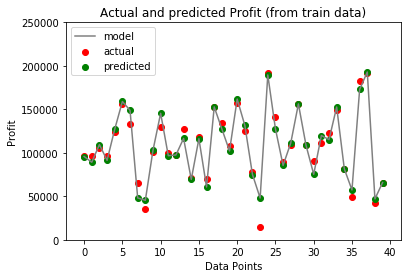

In [12]:
xrange = np.arange(0,len(X_train),1)  # x-axis range for plotting the y
plt.scatter(xrange,y_train, color='red', label='actual') # Plot the actual y
plt.scatter(xrange,y_pred, color='green', label='predicted') # Plot the predicted y_pred
plt.plot(xrange, y_pred, color = "grey", label='model')
plt.title('Red: actual data;  Green: predicted data')
plt.title('Actual and predicted Profit (from train data)')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.ylim(0,250000)
plt.show()

Here if we plot all those predictors and the predicted output. We may learn that not all the predictors (independent variables) have equal impact on the outcome. Some of the predictors seem to have litte impact on the outcome, while other have greater impact. 

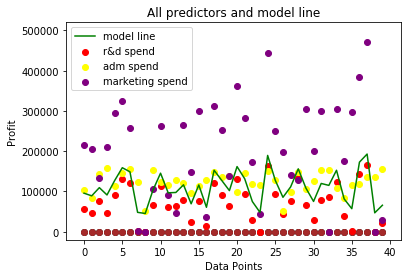

In [20]:
xrange = np.arange(0,len(X_train),1)  # x-axis range for plotting the y_pred

# Plot all the predictors
plt.scatter(xrange, X_train[:,0], color="black")      # Scatter the X_train[col. 0]
plt.scatter(xrange, X_train[:,1], color="brown")      # Scatter the X_train[col. 1]
plt.scatter(xrange, X_train[:,2], color="red", label='r&d spend')          # Scatter [col. 2] R&D Spend
plt.scatter(xrange, X_train[:,3], color="yellow", label='adm spend')       # Scatter [col. 3] Administration Spend
plt.scatter(xrange, X_train[:,4], color="purple", label='marketing spend') # Scatter [col. 4] Marketing Spend

# Plot the Y_pred
plt.plot(xrange,y_pred, color='green', label='model line')              # Plot the resulted y_pred

plt.title('All predictors and model line')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.ylim(-20000,520000)
plt.show()

In the next experiment, we will eliminate those predictors that have little impact on the outcome. The purpose is to find the predictors, that we want to alter, that can effectively give the intended output. Also with less predictors the machine can perform data analysis faster, less costly and reduce unnecessary noise. Thus the end result is the optimal model involving only predictors having significant impact to the outcome.

The procedure we will use is the Backward Elimination.  

.

**Backward Elimination**

The backward elimination works based on the P value of predictor. This P value is indicating the probability of a predictor having **NO** impact to the outcome. Elimination is done iteratively. In every iteration, the P values of the predictors are calculated. Then the predictor with the highest P value is eliminated, before performing the next iteration. It continues until all predictors having P value less than the target P remains. In other words, we can say that a predictor with high P value, has higher chance for elimination.  

Before we proceed, let's firstly review our predictor matrix $X$.

The $X$ has 5 predictors, 3 of them are original dataset *R&D Spend, Administration Spend and Marketing Spend*. The other two predictors are the result of converting the categorical *State* predictor. So the model that represent this scenario is like below:

\begin{align*}
y &= b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_4D_1 + b_5D_2\\
\end{align*}

The original dataset has *x1, x2* and *x3*, then we added the dummy *D1* and *D2*. These dummy variables are used to represent a categorical predictor *State* which is in the form of string variable. The *x1* to *x3*, *D1* and *D2* are basically the values of the columns col-0 till col-4, representing the original predictors (*R&D Spend, Administration Spend* and *Marketing Spend*), and the dummy predictors (conversion from the *State* categorical predictor). With data on these columns, the machine shall find the *b1* to *b5*.

But now, how the machine learn to determine b0? There is no predictor associated with this constant, which the coefficient b0 can be applied to.
So we need *x0*, which is necessary for the machine to calculate *b0*. 

Basically the the *x0* has values all the same but is implicitly assumed. To make the model in a complete form, we need to add one column representing the *x0* and fill it with all values 1:


In [21]:
Xcomplete = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
# please check, you get the modified Xcomplete with first column having all 1s
# we have now 6 columns representing x0 to x5
# col0=x0, col1=x1, ...,col5=x5
print(Xcomplete[0:5,:])

[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]]


As you see below, the *Xcomplete* now has 6 columns. The order may not exactly the same as in the model equation. Here is the correspondence between columns and the model equation:

- col-0: which is set to be all '1', representing *x0* predictor
- col-1 & col-2: for *D1* and *D2* representing State predictor
- col-3: representing *x1* (R&D Spend predictor)
- col-4: representing *x2* (Administration Spend predictor)
- col-5: representing *x3* (Marketing Spend predictor)


The method used in every iteration is the OLS (Ordinary Linear Regressor) from the package *statsmodels*. As for the target P, let us use 5% or 0.05, which means that if the P of particular predictor is > 0.05, we will eliminate it for the next iteration. 

At the end we will have predictors with their P values < or same as 0.05. It is the same as we want the predictors that has probability 95% or above to have impact to the outcome. 

We will now start backward elimination to the *Xcomplete*, but we will use the final optimized predictor array to be *Xopt*. As for the first iteration, the *Xopt* is set to be the same as the *Xcomplete*. 

Now let's start with **1st iteration**:

In [22]:
#1st Iteration
#
import statsmodels.api as sm
Xopt = np.zeros((len(Xcomplete), 6))
Xopt[:,0:6] = Xcomplete[:,[0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(y, Xopt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.34e-27
Time:                        08:21:06   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

In the dispalyed summary, we notice that the *x2* has the highest P value. Please note that the order of the reported predictors *const, x1, x2,....,x5* correspond to the input of the predictor array. In this 1st iterator it corresponds to the col-0, col-1, ...,col-5 of the *Xcomplete*. So, we need to remove the col-2 for the next iteration.

Now proceed with **2nd iteration**:

In [23]:
# 2nd Iteration
Xopt = np.zeros((len(Xcomplete), 5))
Xopt[:,0:5] = Xcomplete[:,[0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(y, Xopt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           8.49e-29
Time:                        08:21:17   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.0

Now we notice, the *x1* has the highest P value, and we will remove it from the 3rd iteration. It correspond to the col-1 on the input *Xcomplete* during the 2nd iteration. SO we will remove col-1.

Proceed to the **3rd iteration**:

In [24]:
#3rd iteration
#
Xopt = np.zeros((len(Xcomplete), 4))
Xopt[:,0:4] = Xcomplete[:,[0, 3, 4, 5]]
regressor_OLS = sm.OLS(y, Xopt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           4.53e-30
Time:                        08:21:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

Result from the 3rd iteration shows that there is still a predictor having P > 0.05. We will remove it in the next 4th iteration. The *x2* which correspond to the col-4 has to be removed.

Proceed with the **4th iteration**:

In [25]:
# 4th iteration
#
Xopt = np.zeros((len(Xcomplete), 3))
Xopt[:,0:3] = Xcomplete[:,[0, 3, 5]]
regressor_OLS = sm.OLS(y, Xopt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           2.16e-31
Time:                        08:21:41   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

At this point, there is still one predictor *x2*, corresponding to col-5, that has P 0.06, higher than the target 0.05. This is actualy close to the target 0.05. The col-5, which represents *Marketing Spend* has 94% probability to have impact to the outcome. 

However we want only predictor that has probability 95% or higher. So we will remove this *x2* or col-5 for the next 5th iteration.

Next proceed to the **5th iteration**:

In [26]:
# 5th iteration
#
Xopt = np.zeros((len(Xcomplete), 2))
Xopt[:,0:2] = Xcomplete[:,[0, 3]]
regressor_OLS = sm.OLS(y, Xopt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.50e-32
Time:                        08:21:52   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

As there is no more predictors with P > 0.05, we stop the iteration here. The result is predictor *const* corresponding to col-0, which is basically representing the *x0* and predictor *x1* corresponding to col-3, representing the predictor *R&D Spend*. This predictor becomes the one having the highest impact to the outcome. The second highest impact comes to the *Marketing Spend*.

Now we can replot again the training dataset, but only involving the *R&D Spend* and *Marketing Spend*:

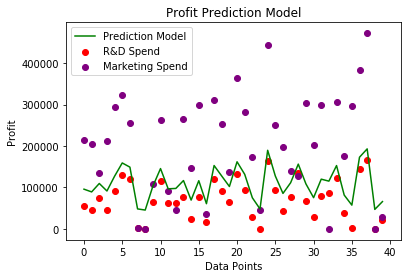

In [34]:
# The %matplotlib is used to plot in an interactive window                 
xrange = np.arange(0,len(X_train),1)  # x-axis range for plotting the y_pred
plt.scatter(xrange, X_train[:,2], color="red", label='R&D Spend')  # Scatter col-2 R&D Spend
plt.scatter(xrange, X_train[:,4], color="purple", label='Marketing Spend')     # Scatter col-4 Marketing Spend
plt.plot(xrange,y_pred, color='green', label='Prediction Model')              # Plot the resulted y_pred
plt.title("Profit Prediction Model")
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Profit')
plt.show()